<h2><b>1. Acquiring the Dataset:<h2></b>
<h5>
The first step involved gathering data from official sources such as government websites, which provided us with state-wise budget allocation data for different financial years (2013-14 and 2024-25 in this case). This is crucial in data engineering as working with real-world data often starts with data acquisition from trustworthy sources. For this project, the data was likely sourced in a tabular format (like Excel or CSV files), which is common in data analysis tasks.</h5>
<hr>

In [ ]:
!pip install seaborn
!pip install matplotlib

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving state.xlsx to state (2).xlsx


<h2>2. Data Preprocessing:</h2>
Data preprocessing is an essential phase in data engineering, which includes steps such as data cleaning, transformation, integration, and reduction.
<ul>
<li><b>Data Cleaning:</b><br>
Data is often incomplete, noisy, or inconsistent. In this project, the dataset had missing values (NaN), which were handled by either filling missing values with 0 or removing invalid data.
Cleaning ensures that the dataset is consistent and reliable, avoiding errors during analysis and visualization.
</li><br>
<li><b>
Data Transformation:
</b><br>
Data transformation involves converting the data into a more suitable format for analysis. In this case, we set appropriate column headers, ensured correct indexing by state names, and performed type conversions where necessary. This helped us prepare the dataset for further analysis and visualizations.</li><br>
<li><b>
Data Integration:<br>
</b>
Since the project involved comparing different financial years, integration was necessary to combine the data into a unified format. We combined the 2024-25 and 2013-14 data for better comparative analysis.
</li><br>
<li><b>
Data Reduction:</b><br>

Data reduction is the process of reducing the volume but maintaining the integrity of the dataset. Although we worked with the full dataset here, we could have applied reduction techniques like aggregating data to a higher level (e.g., grouping smaller states) if needed for simplification.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Excel file
df = pd.read_excel('state.xlsx')

# Step 1: Set the correct column names (set the first row as column headers)
df.columns = df.iloc[0]  # First row becomes header
df = df.drop(0)  # Drop the first row (now it's part of headers)

# Step 2: Rename the first column to 'State'
df = df.rename(columns={df.columns[0]: 'State'})

# Step 3: Set 'State' as the index
df = df.set_index('State')

# Step 4: Convert all columns to numeric (ignore non-numeric errors)
df = df.apply(pd.to_numeric, errors='coerce')

# Step 5: Drop any rows or columns that are fully NaN
df = df.dropna(how='all', axis=1)  # Drop columns with all NaN
df = df.dropna(how='all', axis=0)  # Drop rows with all NaN

# Check the cleaned data
df.head()


,2024-25 Total,2023-24,2022-23,2021-22,2020-21,2019-20,2018-2019,2017-18,2016-17,2015-16,2014-15,2013-14,2012-13,2011-12,2010-11,2009-2010
State,,,,,,,,,,,,,,,,
Andhra Pradesh,50474.64,44698.99,39338.27,30356.31,22610.02,34833.18,33929.84,29001.25,26523.99,22637.97,16838.77,24132.36,20986.60,18304.09,15403.17,15236.74
Arunachal Pradesh,21913.50,19405.97,17081.64,13062.50,9679.78,11085.12,10798.47,9238.79,8471.76,7231.74,9749.36,1140.38,991.84,865.16,728.05,720.18
Assam,39012.77,34548.57,30410.56,23266.50,17220.13,26790.40,26095.30,22301.52,20388.40,17400.88,1256.36,12620.75,10975.63,9572.77,8055.64,7968.61
Bihar,125444.52,111089.98,97784.32,74789.06,55334.34,78202.69,76172.37,65083.19,59462.65,50747.58,13905.02,37977.32,33026.93,28805.50,NaN,23978.38
Chhattisgarh,42492.49,37630.13,33123.02,25331.43,18798.61,24921.31,24275.49,20754.83,18995.65,16213.35,41841.93,8592.52,7472.46,6517.35,5484.44,5425.19


<h2>3. Visualization:</h2>
Once the data was cleaned and transformed, the next step involved generating various visualizations to gain insights. Visualization is an essential part of data analysis and engineering as it helps understand the underlying patterns and trends in data.
<br>
<h4><b>
Line Graph (Trend over Time):
</b></h4><ul>
<li>
The line graph was used to plot budget allocations for the top states from 2013-14 to 2024-25. This visualization is highly useful in spotting trends over time and understanding how the allocation changes year over year.</li><li>
Usefulness: It clearly shows which states have seen significant increases or decreases in allocation over the years, helping policy analysts and decision-makers evaluate funding shifts.</li>

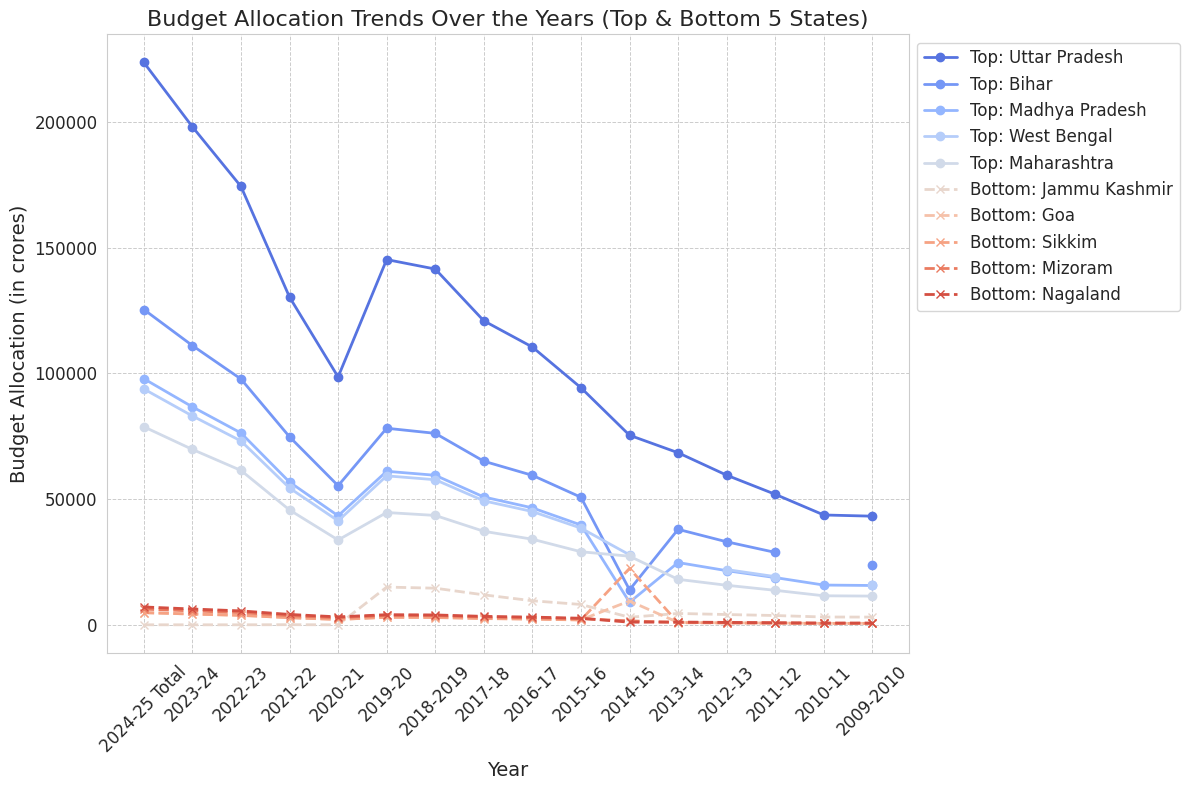

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Increase figure size
plt.figure(figsize=(12, 8))

# Define color palette
sns.set_palette('coolwarm', n_colors=10)

# Select top 5 and bottom 5 states by 2024-25 Total allocation
top_states = df.sort_values(by='2024-25 Total', ascending=False).head(5).index
bottom_states = df.sort_values(by='2024-25 Total', ascending=True).head(5).index

# Plot the trends for each of the top 5 states
for state in top_states:
    plt.plot(df.columns, df.loc[state], label=f'Top: {state}', linewidth=2, linestyle='-', marker='o')

# Plot the trends for each of the bottom 5 states
for state in bottom_states:
    plt.plot(df.columns, df.loc[state], label=f'Bottom: {state}', linewidth=2, linestyle='--', marker='x')

# Add title and labels with custom font sizes
plt.title('Budget Allocation Trends Over the Years (Top & Bottom 5 States)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Budget Allocation (in crores)', fontsize=14)

# Customize ticks and rotation
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Add legend with custom positioning and font size
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


<h4>2. Bar Graph (State-wise Budget Comparison for 2024-25):</h4><ul><b><li>
Insights:</b>
<ul><li><b>
Easy comparison:</b><br> The bar graph clearly highlighted which states received the highest and lowest allocations in 2024-25, making it easy to compare total budget distribution across all states.</li><li><b>
Outlier detection: </b><br>States with the highest bars stood out, and this indicates potential funding outliers—either large states with high needs or regions that may be receiving disproportionate funding.</li><li><b>
Equity assessment:</b><br> By looking at the relative size of the bars, one can assess the equity in budget distribution, especially between states of similar size or needs. If some states receive far more funding than others with similar population or economic status, this could suggest an imbalance.

<ipython-input-45-8532923abfe7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_data.index, y=sorted_data.values, palette="coolwarm")


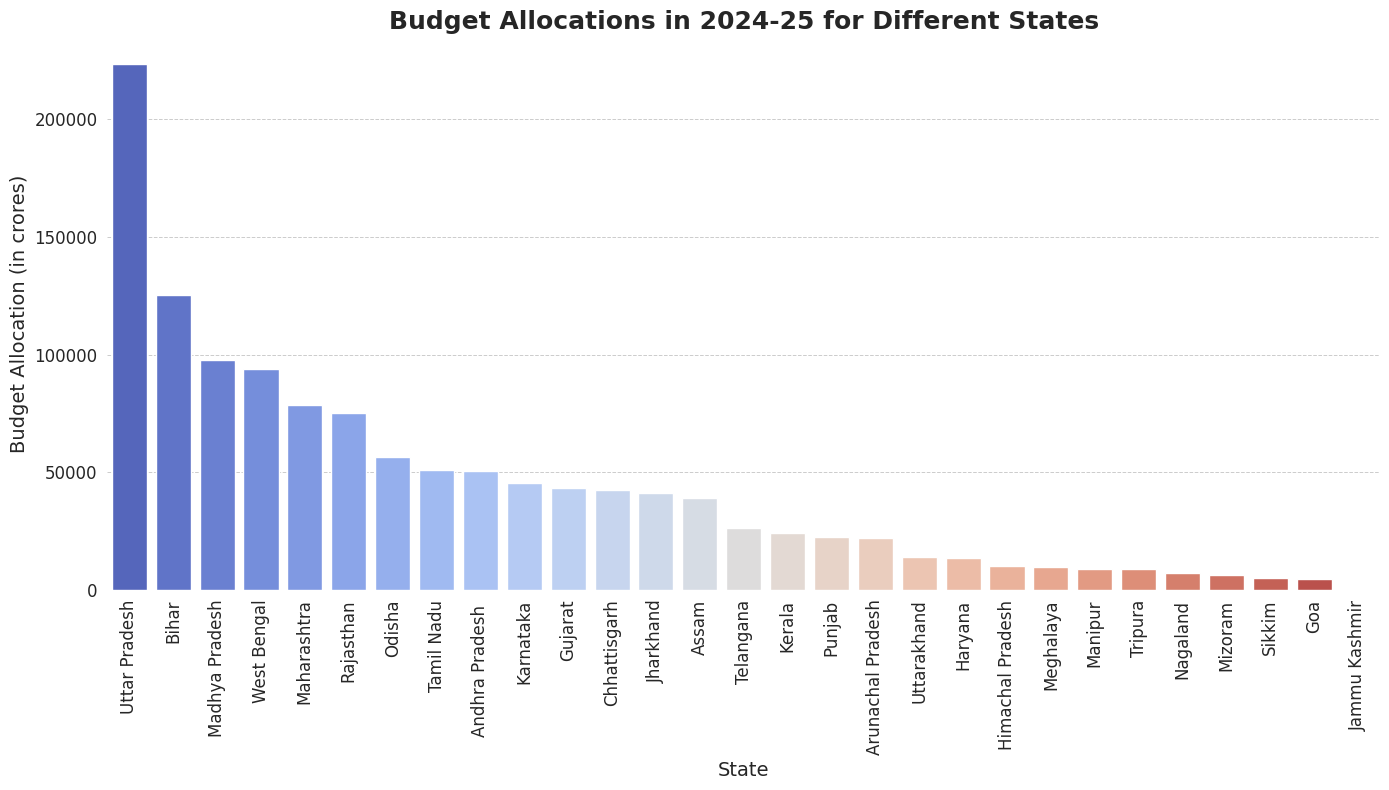

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Increase figure size
plt.figure(figsize=(14, 8))

# Use a coolwarm color palette for a professional look
sns.set_palette('coolwarm')

# Sort states by the 2024-25 Total allocation for the bar chart
sorted_data = df['2024-25 Total'].sort_values(ascending=False)

# Plot the bar chart with enhanced visuals
sns.barplot(x=sorted_data.index, y=sorted_data.values, palette="coolwarm")

# Add title and axis labels with larger font sizes for better readability
plt.title('Budget Allocations in 2024-25 for Different States', fontsize=18, fontweight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Budget Allocation (in crores)', fontsize=14)

# Rotate x-axis labels for better alignment and readability
plt.xticks(rotation=90, fontsize=12)

# Customize the y-axis ticks for clarity
plt.yticks(fontsize=12)

# Add a grid for better readability, but only on the y-axis for a cleaner look
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Remove unnecessary chart borders (despine)
sns.despine(left=True, bottom=True)

# Display the chart with tight layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


<h4><b>3. Heatmap (Correlation Analysis for State Allocations):</h4></b>
<ul><li><b>
State-wise relationships:</b><br> The heatmap helped visualize the correlation between budget allocations for different states. A high correlation between two states could indicate that they are being prioritized similarly, possibly because they share common characteristics like geography, economic profile, or political alignment.</li><li><b>
Pattern discovery: </b><br>Correlation analysis can reveal clusters of states that receive similar funding over time, which might suggest a regional development policy where neighboring states are supported similarly.</li><li><b>
Budget dependencies: </b><br>If two states show a strong correlation, it could also suggest that changes in the budget for one state (due to economic conditions or policies) might affect the other in similar ways, providing insights for future resource allocation strategies.


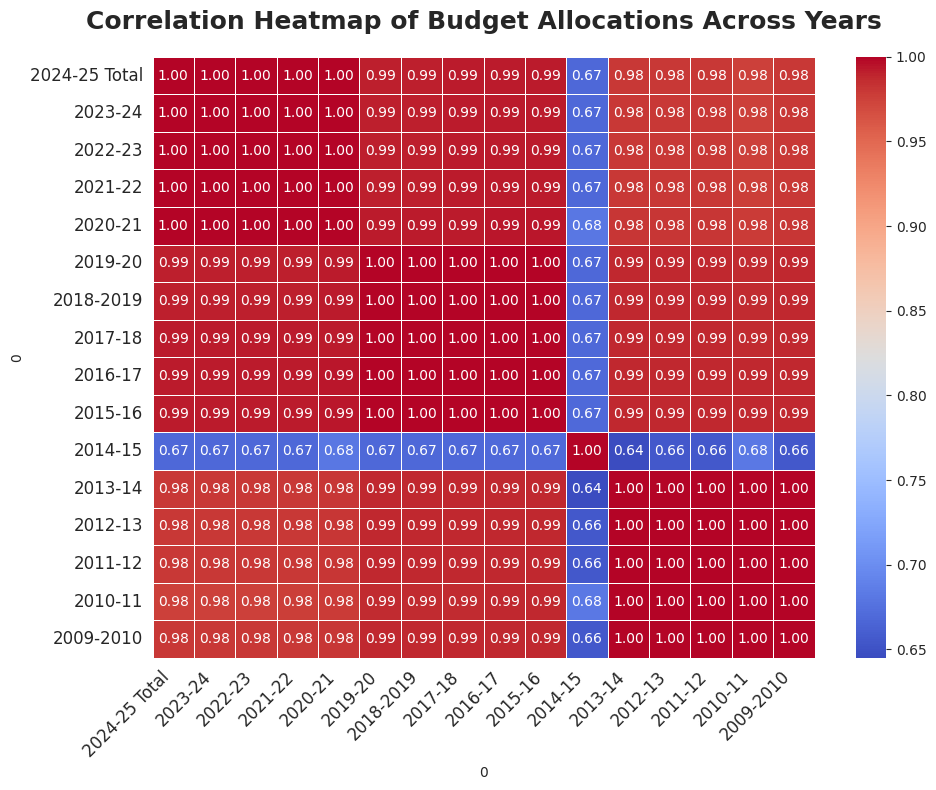

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate the correlation matrix
correlation_matrix = df.corr()

# Step 2: Set up the figure for the heatmap
plt.figure(figsize=(10, 8))

# Step 3: Generate the heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar=True)

# Step 4: Customize the plot for aesthetics
plt.title('Correlation Heatmap of Budget Allocations Across Years', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Step 5: Display the heatmap with a tight layout
plt.tight_layout()
plt.show()


<h4>4. Pie Chart(Share of Total Budget for 2024-25 and 2013-14):</h4>
<ul><li><b>Insights for 2024-25:</b></li>
<ul><li><b>Proportional allocation:</b><br> The pie chart provided a snapshot of how the total budget was distributed across all states in 2024-25. This helps in understanding which states are receiving the largest portions of the overall budget.</li><li><b>
Identifying major recipients: </b><br>States with the largest slices of the pie, such as those occupying more than 10-15%, are clearly the biggest recipients of funding. This could highlight regions that are prioritized for economic growth, infrastructure development, or specific government programs.</li></ul></li><li><b>
Insights for 2013-14:</b><ul><li><b>
Historical comparison:<br> </b>The pie chart for 2013-14 allows us to compare the share of budget allocations with 2024-25. This highlights shifts in priorities over time, showing which states gained or lost funding share over the years.</li><li><b>
State-wise shifts:</b><br> Comparing the two years’ pie charts can also help identify any states that have significantly increased or decreased their share, pointing to political, economic, or policy-driven changes.</li></li>


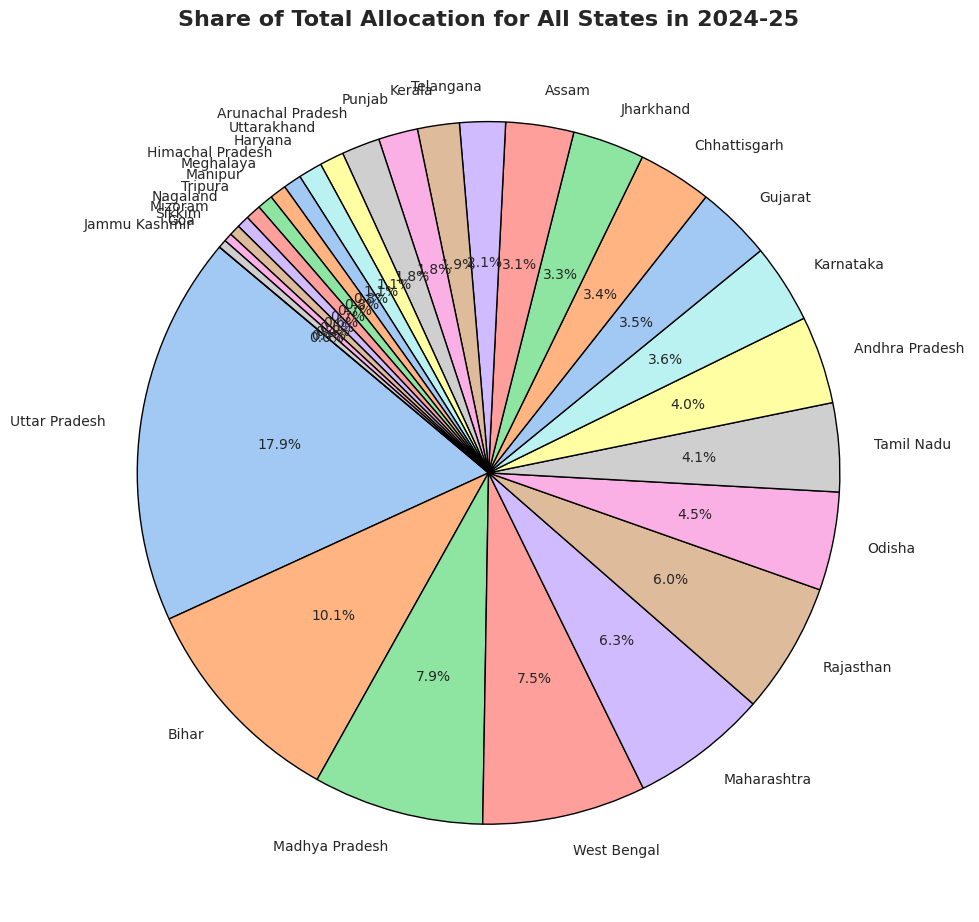

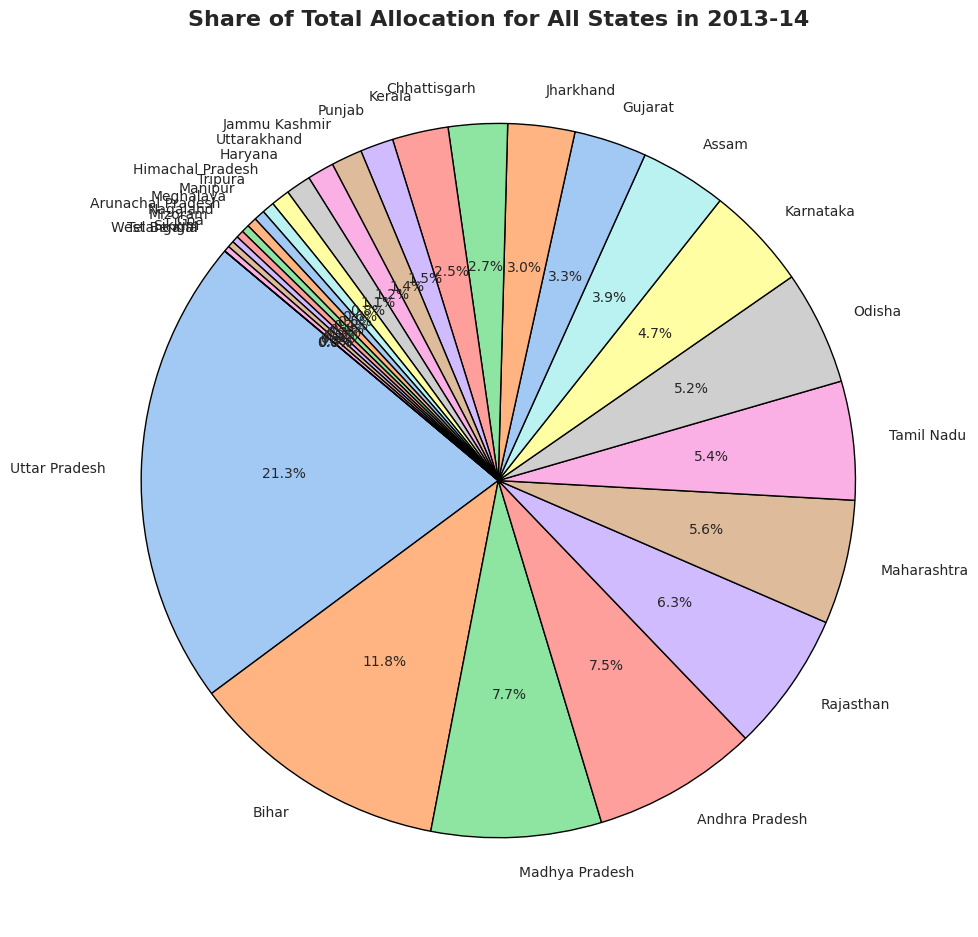

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is the cleaned DataFrame with budget allocations
# df = pd.read_excel('state.xlsx')  # Replace with actual file path

# Step 1: Clean the data by filling or dropping NaN values
# Fill NaN with 0 or drop NaNs based on your preference
df['2024-25 Total'] = df['2024-25 Total'].fillna(0)  # Replace NaN with 0 for 2024-25
df['2013-14'] = df['2013-14'].fillna(0)  # Replace NaN with 0 for 2013-14

# Step 2: Pie chart for all states' share in the 2024-25 allocation
plt.figure(figsize=(10, 10))

# All states' allocations in 2024-25
allocation_2024_25 = df['2024-25 Total'].sort_values(ascending=False)

# Plot the pie chart for 2024-25
plt.pie(allocation_2024_25, labels=allocation_2024_25.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('Share of Total Allocation for All States in 2024-25', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Step 3: Pie chart for all states' share in the 2013-14 allocation
plt.figure(figsize=(10, 10))

# All states' allocations in 2013-14
allocation_2013_14 = df['2013-14'].sort_values(ascending=False)

# Plot the pie chart for 2013-14
plt.pie(allocation_2013_14, labels=allocation_2013_14.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('Share of Total Allocation for All States in 2013-14', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
